In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 157.4150 - root_mean_squared_error: 12.5465
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 150.9519 - root_mean_squared_error: 12.2862
Epoch 3/10
1/1 [==============================] - 0s 887us/step - loss: 146.3944 - root_mean_squared_error: 12.0994
Epoch 4/10
1/1 [==============================] - 0s 947us/step - loss: 142.6553 - root_mean_squared_error: 11.9438
Epoch 5/10
1/1 [==============================] - 0s 858us/step - loss: 139.3922 - root_mean_squared_error: 11.8064
Epoch 6/10
1/1 [==============================] - 0s 882us/step - loss: 136.4466 - root_mean_squared_error: 11.6810
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 133.7307 - root_mean_squared_error: 11.5642
Epoch 8/10
1/1 [==============================] - 0s 955us/step - loss: 131.1897 - root_mean_squared_error: 11.4538
Epoch 9/10
1/1 [==============================] - 0s 939us/step - loss: 128.78

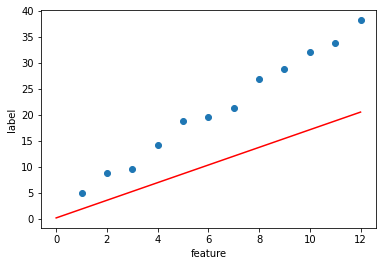

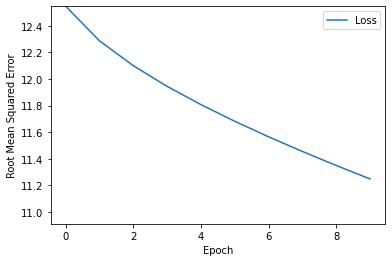

In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 2ms/step - loss: 1311.3669 - root_mean_squared_error: 36.2128
Epoch 2/450
1/1 [==============================] - 0s 1ms/step - loss: 1292.5399 - root_mean_squared_error: 35.9519
Epoch 3/450
1/1 [==============================] - 0s 809us/step - loss: 1279.0129 - root_mean_squared_error: 35.7633
Epoch 4/450
1/1 [==============================] - 0s 1ms/step - loss: 1267.7648 - root_mean_squared_error: 35.6057
Epoch 5/450
1/1 [==============================] - 0s 1ms/step - loss: 1257.8368 - root_mean_squared_error: 35.4660
Epoch 6/450
1/1 [==============================] - 0s 973us/step - loss: 1248.7847 - root_mean_squared_error: 35.3381
Epoch 7/450
1/1 [==============================] - 0s 1ms/step - loss: 1240.3608 - root_mean_squared_error: 35.2188
Epoch 8/450
1/1 [==============================] - 0s 1ms/step - loss: 1232.4115 - root_mean_squared_error: 35.1057
Epoch 9/450
1/1 [==============================] - 0s 971us/step - l

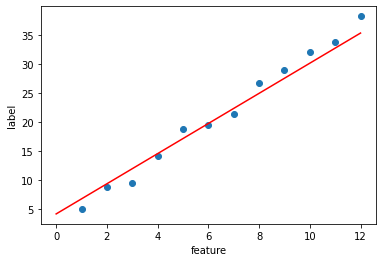

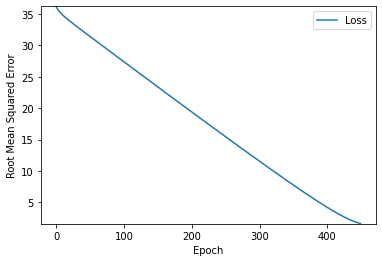

In [ ]:
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 349.3194 - root_mean_squared_error: 18.6901
Epoch 2/500
1/1 [==============================] - 0s 992us/step - loss: 6719542.5000 - root_mean_squared_error: 2592.2080
Epoch 3/500
1/1 [==============================] - 0s 889us/step - loss: 347.0443 - root_mean_squared_error: 18.6291
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.1912 - root_mean_squared_error: 1.4803
Epoch 5/500
1/1 [==============================] - 0s 947us/step - loss: 0.8950 - root_mean_squared_error: 0.9461
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 7/500
1/1 [==============================] - 0s 930us/step - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8762 - root_mean_squared_error: 0.9360
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8761 - r

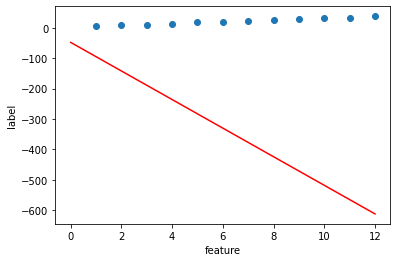

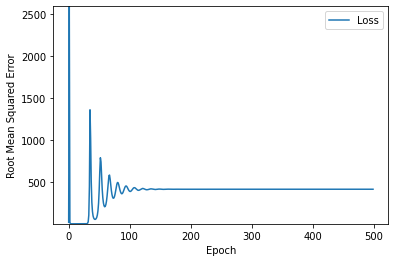

In [ ]:
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 141.4802 - root_mean_squared_error: 11.8945
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 68.1935 - root_mean_squared_error: 8.2579
Epoch 3/70
1/1 [==============================] - 0s 979us/step - loss: 37.5278 - root_mean_squared_error: 6.1260
Epoch 4/70
1/1 [==============================] - 0s 899us/step - loss: 21.4493 - root_mean_squared_error: 4.6313
Epoch 5/70
1/1 [==============================] - 0s 932us/step - loss: 12.4355 - root_mean_squared_error: 3.5264
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 7.2922 - root_mean_squared_error: 2.7004
Epoch 7/70
1/1 [==============================] - 0s 931us/step - loss: 4.3738 - root_mean_squared_error: 2.0914
Epoch 8/70
1/1 [==============================] - 0s 997us/step - loss: 2.7496 - root_mean_squared_error: 1.6582
Epoch 9/70
1/1 [==============================] - 0s 990us/step - loss: 1.8709 - root_mean_squa

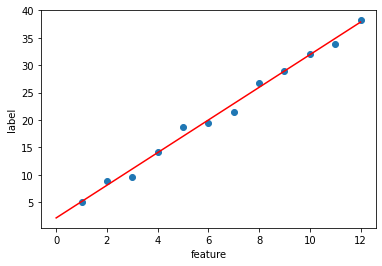

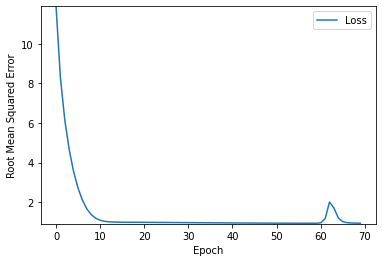

In [ ]:
learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 308.9831 - root_mean_squared_error: 17.5779
Epoch 2/125
12/12 [==============================] - 0s 962us/step - loss: 168.1553 - root_mean_squared_error: 12.9675
Epoch 3/125
12/12 [==============================] - 0s 1ms/step - loss: 90.7168 - root_mean_squared_error: 9.5245
Epoch 4/125
12/12 [==============================] - 0s 985us/step - loss: 46.0996 - root_mean_squared_error: 6.7897
Epoch 5/125
12/12 [==============================] - 0s 1ms/step - loss: 19.5690 - root_mean_squared_error: 4.4237
Epoch 6/125
12/12 [==============================] - 0s 979us/step - loss: 5.8570 - root_mean_squared_error: 2.4201
Epoch 7/125
12/12 [==============================] - 0s 1ms/step - loss: 1.6035 - root_mean_squared_error: 1.2663
Epoch 8/125
12/12 [==============================] - 0s 979us/step - loss: 1.1931 - root_mean_squared_error: 1.0923
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - loss

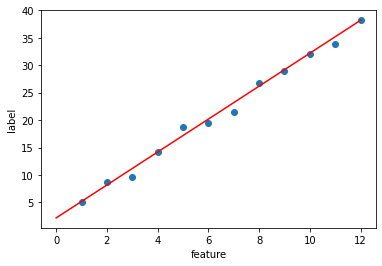

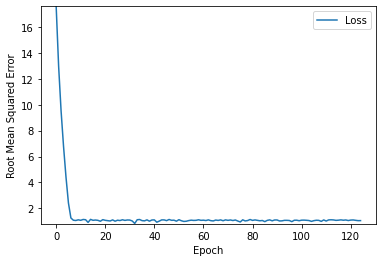

In [ ]:

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.**bold text**
If the training loss does not converge, train for more epochs.